In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("mer_benz_train.csv")
test=pd.read_csv("mer_benz_test.csv")
print(train)
print(test)

        ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378   
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0  \
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
0        0     0    

In [3]:
nv=train.isnull().sum()
null =nv[nv>0]
null


Series([], dtype: int64)

In [4]:
nv=test.isnull().sum()
null =nv[nv>0]
null

Series([], dtype: int64)

In [5]:
train.duplicated().sum()
test.duplicated().sum()


0

In [6]:
train.dtypes.value_counts()

int64      369
object       8
float64      1
Name: count, dtype: int64

In [7]:
test.dtypes.value_counts()

int64     369
object      8
Name: count, dtype: int64

In [8]:
nv=train.isnull().sum()
null =nv[nv>0]
null

Series([], dtype: int64)

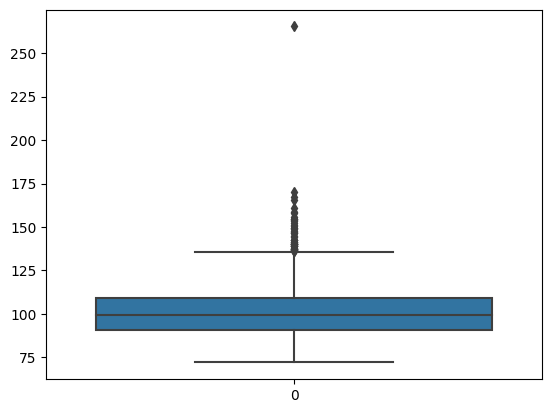

In [9]:
sns.boxplot(train['y'])
plt.show()

In [10]:
q1=train['y'].quantile(0.25)
q3=train['y'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr


In [11]:
out_ind =train[train['y']>upper].index
out_ind

Index([  43,  203,  216,  253,  342,  420,  429,  681,  846,  883,  889,  900,
        995,  998, 1033, 1036, 1060, 1141, 1203, 1205, 1269, 1279, 1349, 1459,
       1730, 2240, 2263, 2348, 2357, 2376, 2414, 2470, 2496, 2735, 2736, 2852,
       2887, 2888, 2905, 2983, 3028, 3090, 3133, 3177, 3215, 3442, 3744, 3773,
       3980, 4176],
      dtype='int64')

In [12]:
print(train[train['y']>upper].shape)
print(train[train['y']<lower].shape)

(50, 378)
(0, 378)


In [13]:
out =train.drop(out_ind)
out

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


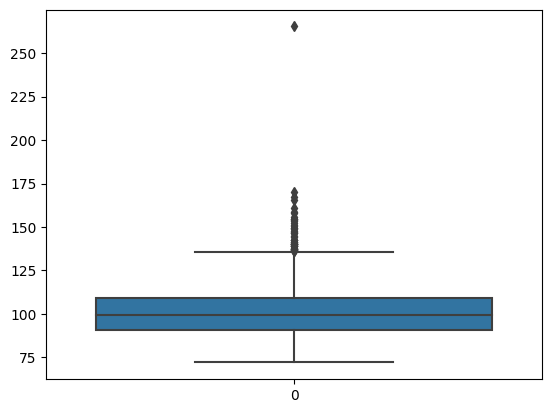

In [14]:
sns.boxplot(train['y'])
plt.show()

In [15]:
num_data =train.dtypes[train.dtypes!='object'].index
cat_data =train.dtypes[train.dtypes=='object'].index
print(num_data)
print(cat_data)

Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


In [16]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()
for col in cat_data:
    # Fit on train data
    lb.fit(train[col])
    
    # Transform both train and test data
    train[col] = lb.transform(train[col])
    test[col] = lb.transform(test[col])
`` 

In [ ]:
x=train.drop('y',axis=1)
y=train['y']
print(x.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val =train_test_split(x,y,test_size =0.20,random_state=35)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
sc.fit(x_train)
x_train1 =sc.transform(x_train)
x_val1 = sc.transform(x_val)
x_test1 =sc.transform(x_test)



In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
def reg_eval(y_val,y_pred):
    mse=mean_squared_error(y_val,y_pred)
    rmse =np.sqrt(mse)
    mae =mean_absolute_error(y_val,y_AEpred)
    r2_score=r2_score(yval,y_pred)
    print("MSE:",mse)
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("r2_score",r2_score)
def model_score(model):
    print("Training score:",model.score(x_train,y_train))
    print("Testing_score:",model.score(x_val,y_val))

In [ ]:
lr =LinearRegression()
lr.fit(x_train,y_train)

In [ ]:
y_pred_val = lr.predict(x_val)
eval_model(y_val,y_pred_val)


In [ ]:
y_pred_test =  lr.predict(x_test)
print(y_pred_test)

In [ ]:
submission = pd.DataFrame({"ID":test['ID'],"pred":y_pred_test})
submission